# EART 70013  <a class="tocSkip">
    
# Applied Inversion Methods <a class="tocSkip">    
    
## Lecture 1 - Homework Solutions <a class="tocSkip">  

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Homework" data-toc-modified-id="Homework-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Homework</a></span><ul class="toc-item"><li><span><a href="#Homework---Checking-properties-of-transposes" data-toc-modified-id="Homework---Checking-properties-of-transposes-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Homework - Checking properties of transposes</a></span></li><li><span><a href="#Homework---Prove-that-$(AB)^T-=-B^T-A^T$" data-toc-modified-id="Homework---Prove-that-$(AB)^T-=-B^T-A^T$-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Homework - Prove that $(AB)^T = B^T A^T$</a></span></li><li><span><a href="#Homework---Symmetric-matrices" data-toc-modified-id="Homework---Symmetric-matrices-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Homework - Symmetric matrices</a></span></li><li><span><a href="#Homework---Matrix-vector-multiplication-as-a-weighted-sum-of-columns" data-toc-modified-id="Homework---Matrix-vector-multiplication-as-a-weighted-sum-of-columns-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Homework - Matrix-vector multiplication as a weighted sum of columns</a></span></li><li><span><a href="#Homework---Fitting-two-data-points" data-toc-modified-id="Homework---Fitting-two-data-points-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Homework - Fitting two data points</a></span></li><li><span><a href="#Homework---Squared-error-calculation-(from-Numerical-Methods)" data-toc-modified-id="Homework---Squared-error-calculation-(from-Numerical-Methods)-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Homework - Squared error calculation (from Numerical Methods)</a></span></li><li><span><a href="#Homework---Degree-of-approximation-(from-Numerical-Methods)" data-toc-modified-id="Homework---Degree-of-approximation-(from-Numerical-Methods)-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Homework - Degree of approximation (from Numerical Methods)</a></span></li></ul></li></ul></div>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sl
import scipy.optimize as sop
import random
from pprint import pprint

# Homework

## Homework - Checking properties of transposes

Check the four properties of the transpose operator from the lecture for some example matrices.

Hint: 

```Python
A = np.random.random((m,n))
```

is a convenient way to generate an arbitrary m by n matrix.

In [63]:
# Define arbitrary dimensions
m = 3
n = 3

# Generate our random matrix
A = np.random.random((m, n))
B = np.random.random((m, n))

# Testing commutativeness 
ABt = (A+B).transpose()
AtBt = A.transpose() + B.transpose()

# Testing scalar multiplication

alpha = 5

aAt = (alpha * A).transpose()
a_At = alpha * A.transpose()

# Testing matrix multiplication

A_times_Bt = (A*B).transpose()
At_times_Bt = A.transpose() * B.transpose()

# Check double transpose

Att = (A.transpose()).transpose()

# Check if the same
print(np.allclose(ABt, AtBt)) # Commute
print(np.allclose(aAt, a_At)) # Scalar multiplication
print(np.allclose(A_times_Bt, At_times_Bt)) # Matrix multi
print(np.allclose(Att, A)) # Double transpose

True
True
True
True


## Homework - Prove that $(AB)^T = B^T A^T$

As per the section title!

Hint: Writing in index notation $A = [a_{ij}]_{m\times n}$ and $B = [b_{ij}]_{n\times p}$
the product can be defined as: the $(i,j)$-th entry of the product $AB$ is given by
$$\sum_{k=1}^n a_{ik} b_{kj}$$
with $A$ being an $m\times p$ matrix.

In [66]:
AB = np.zeros_like(A) # init sum matrix for above definition

# Loop through [m, n] indices
for i in range(m):
    for j in range(n):
        AB[i,j] += A[i, j] * B[i, j]

ABt = AB.transpose()
At_times_Bt = A.transpose() * B.transpose()

# Check if equal
np.allclose(ABt, At_times_Bt)

True

## Homework - Symmetric matrices

1. Given an $n\times n$ symmetric matrix $A$ and an arbitrary $m\times n$ matrix B, show that the matrix $BAB^T$ is symmetric.

Verify through an example using NumPy.



2. If $A$ and $B$ are both symmetric square matrices, are $AB+BA$ and $AB-BA$ symmetric or skew-symmetric?

In [57]:
# Define matrix dimensions
m = 2
n = 2

# Initialise random matrices
A = np.array([[5, 0], [0, -5]]) # Create symmetrical matrix 
B = np.random.random((m, n))

At = A.transpose()

np.allclose(A, At)

# Note that A is symmetric if it satisfies A = A^T. In this case we must find that BAB^T = (BAB^T)^T.
BABt = B @ A @ B.transpose()
BABtt = BABt.transpose()

# Check if true
np.allclose(BABt, BABtt)

True

## Homework - Matrix-vector multiplication as a weighted sum of columns

In the lecture we pointed out "another useful interpretation" of matrix vector multiplication.

Code up this approach and perform the same testing that we did in the lecture for `def mat_vec_product(A, x)`.

It was shown that the other useful interpretation of matrix vector multiplication is to think of the product of the matrix $A$ with the vector $\mathbf{x}$ as equal to a weighted sum of the columns of $A$, where the weights are defined by the parameters in $\mathbf{x}$. We can write this as $$A\mathbf{x}=[x_0a_{:1}, x_1a_{:2}, \dots, x_{n}a_{:m}],$$ where $$A=\left[\begin{matrix} a_{11} & a_{12} & \dots & a_n \\ a_{21} & a_{22} & \dots & \vdots \\ \vdots & \dots & \ddots & \vdots \\ a_{n1} & a_{n2} & \dots & a_{mn} \end{matrix} \right], $$ and $$\mathbf{x}= \left[ \begin{matrix} x_0 \\ x_1 \\ \vdots \\ x_n\end{matrix}\right].$$

In [36]:
# Defining our dimensions
m = 4
n = 4

# Let's define A and x

A = np.random.random((m, n))
x = np.random.random((n,))

[0.09373175 0.330529   0.19726475 0.46052601]


In [56]:
# Defined in the lecture

def mat_vec_product(A, x):
    """Function to compute the matrix vector product Ax.

    Parameters
    ----------
    A : ndarray
        Some matrix A with shape (m,n)
    x : array_like
        Some vector x with shape (n,)

    Returns
    -------
    b : ndarray
        RHS vector b with shape (m,)
    """
    m, n = np.shape(A)
    assert x.ndim == 1 # restrict to the case where x is 1D
    assert n == len(x) # as 1D we can check the length of x is consistent with A
    b = np.zeros(m) # and then initialise to zero the appropriate length array for b
    for i in range(m):
        for j in range(n):
            b[i] += A[i, j] * x[j]
    return b

# Executing the product using the function defined in the lecture
b = mat_vec_product(A, x)

# Computing the product directly 
Ax = A@x

# Checking similarity between two methods
np.allclose(b, Ax)

[0.3690465  0.47438835 0.56861975 0.86826218]


True

## Homework - Fitting two data points

We stated in class that:


The polynomial that fits the two data points $\{(x_0,y_0),(x_1,y_1)\}$ is clearly the linear function given by

$$ y = f(x) \equiv a_0 + a_1\,x \;\;\;\;\; \text{i.e. the degree one polynomial:} \;\;\;\;\; y = P_1(x) \equiv a_0 + a_1\,x$$

where through substitution we arrive at  two simultaneous equations (or a $2\times 2$ matrix system) which can fairly easily be solved by substituting one equation into the other to conclude that

$$ a_0 = y_0 - \frac{y_1-y_0}{x_1-x_0}x_0, \;\;\;\;\;\;\;\; a_1 = \frac{y_1-y_0}{x_1-x_0}. $$

Form the set of two simultaneous equations and solve by hand to derive this solution for the coefficients.

<br> 

Confirm that this result is exactly the same as the Lagrange polynomial (we saw in the lecture) that you can just write down without needing to invert any system for coefficients.

Our two simultaneous equations are $$(1) \ y_0 = a_0 + a_1 x_0,$$ $$(2) \ y_1 = a_0 + a_1x_1$$ and we can rewrite equation (1) to be $$a_0=y_0-a_1x_0.$$ Then, subsituting yields $$y_1 = (y_0-a_1x_0) + a_1x_1,$$ $$a_1(x_0+x_1) = y_1 - y_0,$$ $$\Rightarrow a_1 = \frac{y_1-y_0}{x_0+x_1}. \ (3)$$ Now, we can substitude (3) into (2) to finally yield $$a_0 = y_0 - \frac{y_1 - y_0}{x_1 - x_0}x_0.$$ Now we have $$y = f(x) = P_1(x) = a_0 + a_1x_1,$$ which we can write as $$P_1(x) = \left(y_0 - \frac{y_1 - y_0}{x_1 - x_0}x_0\right) + \left(\frac{y_1-y_0}{x_0-x_1}\right)x_1,$$ $$P_1(x) = y_0 - \frac{x_0y_1}{x_1-x_0} + \frac{x_0y_0}{x_1-x_0} + \frac{x_1y_1}{x_1-x_0} - \frac{x_1y_0}{x_1-x_0},$$ $$= \frac{1}{x_1-x_0}(y_0(x_1-x_0) - x_0y_1 + x_0y_0 + x_1y_1 - x_1y_0),$$ $$= \frac{1}{x_1-x_0}(y_0(x_1-x_0) + y_1(x_1-x_0)),$$ leading to $$P_1(x)= \frac{x - x_1}{x_0-x_1}\,y_0 + \frac{x - x_0}{x_1-x_0}\,y_1$$

For the sake of summary, recognise that forming this system of equations and solving for the parameters $a_n$ is equivalent to inverting for the vector $\mathbf{A}$ in the inverse problem, which involves forming and solving the system of equations $$A\mathbf{x}=\mathbf{y},$$ which is of course in this case $$\left(\begin{matrix}a_0 \\ a_1 \end{matrix} \right) \left(\begin{matrix} 1 & x_0 \\ 1 & x_1\end{matrix} \right) = \left(\begin{matrix} y_0 \\ y_1 \end{matrix} \right)$$

## Homework - Squared error calculation (from Numerical Methods)

As described in the docs ([numpy.polyfit](http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html)), least squares fitting minimises the square of the difference between the data provided and the polynomial,

$$E = \sum_{i=0}^{N} (p(x_i) - y_i)^2,$$

where $p(x_i)$ is the value of the polynomial function that has been fit to the data evaluated at point $x_i$, and $y_i$ is the $i^{th}$ data value.

Write a Python function that evaluates the squared error, $E$, and use this function to evaluate the error for each of the polynomials calculated below. 


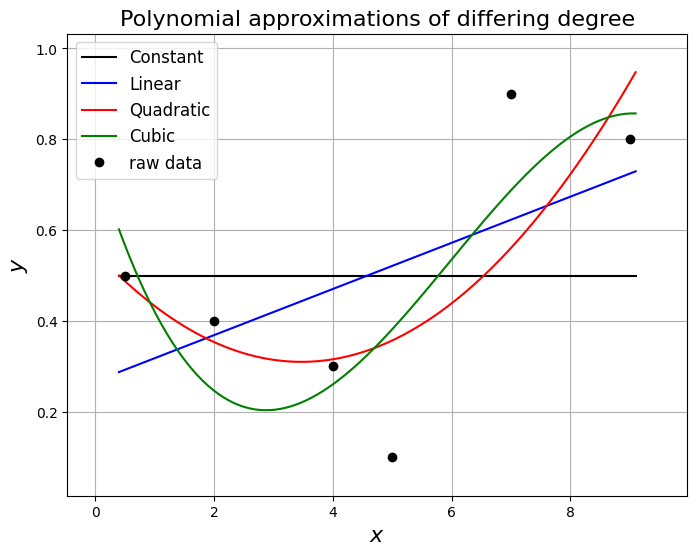

In [ ]:
# create the polynomials using code from the lecture

# consider the above example data again
xi=np.array([0.5,2.0,4.0,5.0,7.0,9.0])
yi=np.array([0.5,0.4,0.3,0.1,0.9,0.8])

"""
Note: this process creates callable polynomial functions pn which is evaluated at every value of x when called
during plotting via pn(x), where x is some array of numbers. In the case below, x is an array of 100 equally spaced
numbers between 0.4 and 9.1.

"""

# Calculate coefficients of polynomial degree 0 - ie a constant value.
poly_coeffs=np.polyfit(xi, yi, 0)

# Construct a polynomial function which we can use to evaluate for arbitrary x values.
p0 = np.poly1d(poly_coeffs)

# Fit a polynomial degree 1 - ie a straight line.
poly_coeffs=np.polyfit(xi, yi, 1)
p1 = np.poly1d(poly_coeffs)

# Quadratic
poly_coeffs=np.polyfit(xi, yi, 2)
p2 = np.poly1d(poly_coeffs)

# Cubic
poly_coeffs=np.polyfit(xi, yi, 3)
p3 = np.poly1d(poly_coeffs)

# and plot again
def plot_raw_data(xi, yi, ax):
    """plot x vs y on axes ax, 
    add axes labels and turn on grid
    """
    ax.plot(xi, yi, 'ko', label='raw data')
    ax.set_xlabel('$x$', fontsize=16)
    ax.set_ylabel('$y$', fontsize=16)
    ax.grid(True)
    
    
# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

x = np.linspace(0.4, 9.1, 100)

ax1.plot(x, p0(x), 'k', label='Constant')
ax1.plot(x, p1(x), 'b', label='Linear')
ax1.plot(x, p2(x), 'r', label='Quadratic')
ax1.plot(x, p3(x), 'g', label='Cubic')

# Overlay raw data
plot_raw_data(xi, yi, ax1)

ax1.legend(loc='best', fontsize = 12)
ax1.set_title('Polynomial approximations of differing degree', fontsize=16);


In [106]:
# Now we can write a function to evaluate the squared error
def sqr_error(pn, x, y):
    error = 0 # initialise error sum to be zero
    for xi, yi in zip(x, y):
        error += (pn(xi) - yi)**2
    return error

for pn in (p0, p1, p2, p3):
    print(f'Sqr error: {sqr_error(pn, xi, yi)}')

Sqr error: 0.4600000000000001
Sqr error: 0.33298899237933965
Sqr error: 0.1994782421425494
Sqr error: 0.15730343662323767


## Homework - Degree of approximation (from Numerical Methods)

Extend the previous question above by fitting and plotting polynomials of increasing degree past cubic. At what *degree* does the resulting polynomial approximation fit the data exactly?


C:\Users\dnrlu\AppData\Local\Temp\ipykernel_22532\2037005381.py:14: RankWarning: Polyfit may be poorly conditioned
  poly_coeffs = np.polyfit(xi, yi, 6)
C:\Users\dnrlu\AppData\Local\Temp\ipykernel_22532\2037005381.py:18: RankWarning: Polyfit may be poorly conditioned
  poly_coeffs = np.polyfit(xi, yi, 7)


Sqr error: 0.15730343662323767
Sqr error: 0.0469232378117955
Sqr error: 2.025761293426526e-26
Sqr error: 1.068082305595471e-26
Sqr error: 1.0141400123038978e-27


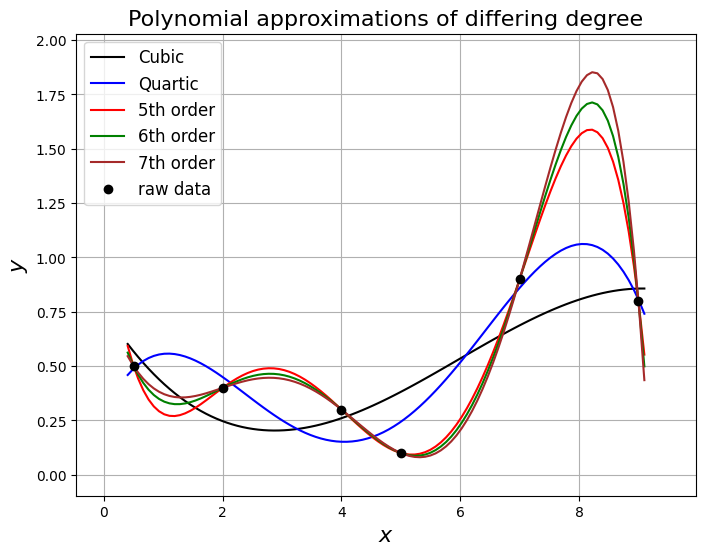

In [112]:
# Cubic
poly_coeffs=np.polyfit(xi, yi, 3)
p3 = np.poly1d(poly_coeffs)

# Quartic
poly_coeffs = np.polyfit(xi, yi, 4)
p4 = np.poly1d(poly_coeffs)

# Pentic
poly_coeffs = np.polyfit(xi, yi, 5)
p5 = np.poly1d(poly_coeffs)

# Hexic
poly_coeffs = np.polyfit(xi, yi, 6)
p6 = np.poly1d(poly_coeffs)

# Septic
poly_coeffs = np.polyfit(xi, yi, 7)
p7 = np.poly1d(poly_coeffs)

# and plot again
def plot_raw_data(xi, yi, ax):
    """plot x vs y on axes ax, 
    add axes labels and turn on grid
    """
    ax.plot(xi, yi, 'ko', label='raw data')
    ax.set_xlabel('$x$', fontsize=16)
    ax.set_ylabel('$y$', fontsize=16)
    ax.grid(True)
    
    
# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

x = np.linspace(0.4, 9.1, 100)

ax1.plot(x, p3(x), 'k', label='Cubic')
ax1.plot(x, p4(x), 'b', label='Quartic')
ax1.plot(x, p5(x), 'r', label='5th order')
ax1.plot(x, p6(x), 'g', label='6th order')
ax1.plot(x, p7(x), 'brown', label='7th order')

# Overlay raw data
plot_raw_data(xi, yi, ax1)

ax1.legend(loc='best', fontsize = 12)
ax1.set_title('Polynomial approximations of differing degree', fontsize=16);

for pn in (p3, p4, p5, p6, p7):
    print(f'Sqr error: {sqr_error(pn, xi, yi)}')


So the error becomes negligible at the 5th order, which is as expected.